In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import datetime as dt
import plotly.express as px 
import math
import joblib
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 
from sklearn.linear_model import LogisticRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import confusion_matrix, accuracy_score,mean_squared_error,r2_score,classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("data/spotify.csv")

In [4]:
for i in data.columns:
  print(i,data[i].nunique())

Unnamed: 0 2017
acousticness 1394
danceability 632
duration_ms 1921
energy 719
instrumentalness 1107
key 12
liveness 793
loudness 1808
mode 2
speechiness 792
tempo 1919
time_signature 4
valence 853
target 2
song_title 1956
artist 1343


In [5]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [6]:
data=data.drop(['Unnamed: 0'],axis=1)

In [7]:
data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [8]:
data.shape

(2017, 16)

In [9]:
data.dtypes

acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

In [10]:
data.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [11]:
numcols=data.dtypes[(data.dtypes=='float64')].index

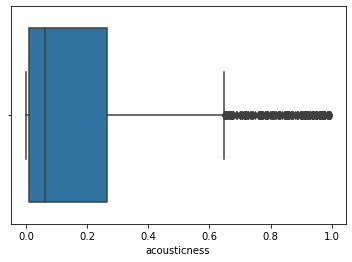

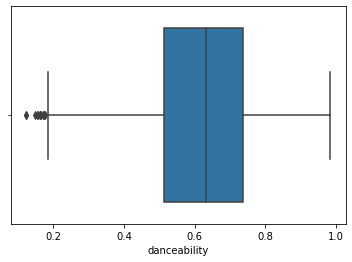

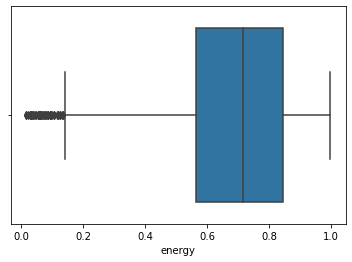

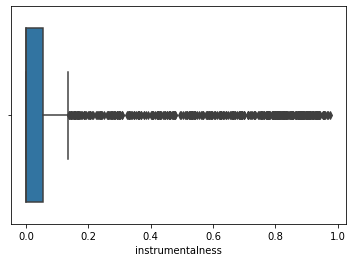

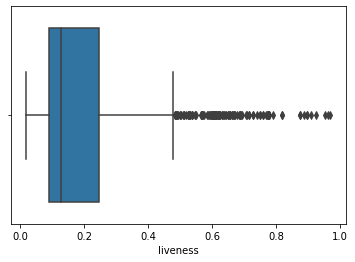

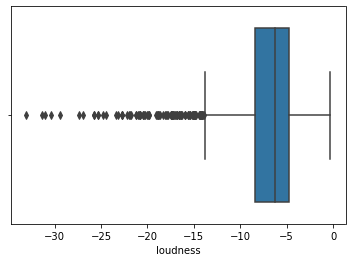

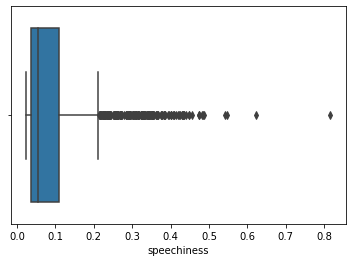

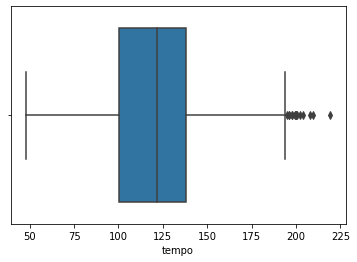

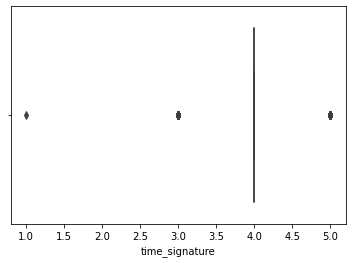

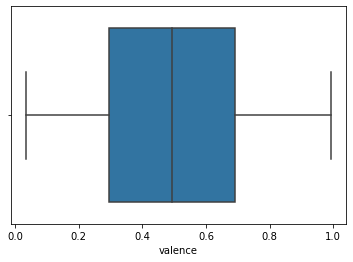

In [12]:
for x in numcols:
    sns.boxplot(data[x])
    plt.show()

In [13]:
for x in numcols:
    desc=data[x].describe()
    IQR=desc['75%']-desc['25%']
    ul=desc['75%']+1.5*IQR
    ll=desc['25%']-1.5*IQR
    data[x][data[x]>ul]=ul
    data[x][data[x]<ll]=ll

In [14]:
X=data.drop(['target'],axis=1)
y=data['target']

In [15]:
X=pd.get_dummies(X)

In [16]:
X.shape,y.shape

((2017, 3312), (2017,))

In [17]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.20,random_state=42)

In [18]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1613, 3312), (404, 3312), (1613,), (404,))

In [19]:
from sklearn.neighbors import KNeighborsClassifier
n_classifier = KNeighborsClassifier(n_neighbors=3)

In [20]:
n_classifier.fit(X_train,y_train)
y_pred_KNN = n_classifier.predict(X_test)

In [21]:
accuracy_score(y_test,y_pred_KNN)*100

58.168316831683164

In [22]:
confusion_matrix(y_test,y_pred_KNN)

array([[117,  89],
       [ 80, 118]])